In [11]:
import os
import numpy as np
import gpxpy
import gpxpy.gpx
import datareading
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
myproj = ccrs.PlateCarree()                         
from osgeo import gdal, osr
import logging
from importlib import reload
reload(datareading)

<module 'datareading' from '/home/ctroupin/Projects/FNRS-UpwellingFilaments/Filament-Submesoscale/python/datareading.py'>

In [12]:
def read_gpx(filename):
    with open(filename, "r") as gf:
        gpx = gpxpy.parse(gf)
        lon = []
        lat = []
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    lon.append(point.longitude)
                    lat.append(point.latitude)
    return lon, lat

In [13]:
lon, lat = read_gpx("/data/GPX/LaPalma/transvulcania-platano-de-canarias-2015.gpx")

In [6]:
visfile = "/data/Visible/Sentinel-2_L1C_2019-09-21.tiff"
os.path.isfile(visfile)

True

In [7]:
lapalma = datareading.Visible()
lapalma.read_geotiff(visfile)

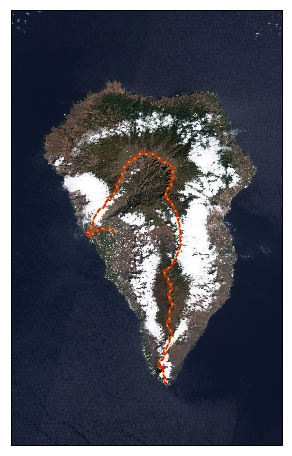

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection=myproj)
lapalma.add_to_plot(ax, myproj)
ax.set_xlim(-18.05, -17.69)
ax.plot(lon, lat, "r--", zorder=3)
ax.plot(lon, lat, "-", color="y")
plt.savefig("transvulcania2015", dpi=300, bbox_inches="tight")
plt.show()
plt.close()